In [23]:
import cv2
import numpy as np
 
def nothing(x):
    pass
 
cap = cv2.VideoCapture(0)
cv2.namedWindow("Trackbars",  cv2.WINDOW_NORMAL)
 
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("U - H", "Trackbars", 180, 255, nothing)
cv2.createTrackbar("U - S", "Trackbars", 180, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 180, 255, nothing)
cv2.createTrackbar("canny_1", "Trackbars", 1, 255, nothing)
cv2.createTrackbar("canny_2", "Trackbars", 10, 255, nothing)
cv2.createTrackbar("blur kernel", "Trackbars", 1, 40, nothing)
cv2.createTrackbar("max line length", "Trackbars", 100, 1000, nothing)
cv2.createTrackbar("max line gap", "Trackbars", 10, 200, nothing)
cv2.createTrackbar("Hough threshold", "Trackbars", 1, 50, nothing)
 
try:
    while True:
        v = cv2.VideoCapture('data\Fulham_goal.mp4') # video clip to run on
        ret, frame = v.read() # read first frame
        #print(np.mean(frame[1]))
        l=np.mean(frame)
        l=int(l)
        #print("l: ",l)
        s=int(np.mean(frame[1]))
        #print("s: ",s)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        #print(frame)
        #print("1: ",np.mean(frame[0]))
        #print("2: ",np.mean(frame[1]))
        #print("3: ",np.mean(frame[2]))
        p=np.mean(frame[1])/6
        p=int(p)
        #print(p)
        
    
        l_h = cv2.getTrackbarPos("L - H", "Trackbars")
        l_s = cv2.getTrackbarPos("L - S", "Trackbars")
        l_v = cv2.getTrackbarPos("L - V", "Trackbars")
        u_h = cv2.getTrackbarPos("U - H", "Trackbars")
        u_s = cv2.getTrackbarPos("U - S", "Trackbars")
        u_v = cv2.getTrackbarPos("U - V", "Trackbars")
        canny_1 = cv2.getTrackbarPos("canny_1", "Trackbars")
        canny_2 = cv2.getTrackbarPos("canny_2", "Trackbars")
        blur_kernel = int(cv2.getTrackbarPos("blur kernel", "Trackbars"))
        min_line_length = cv2.getTrackbarPos("max line length", "Trackbars")
        max_line_gap = cv2.getTrackbarPos("max line gap", "Trackbars")
        threshold = cv2.getTrackbarPos("Hough threshold", "Trackbars")
    
        lower = np.array([l_h, l_s, l_v])
        upper = np.array([u_h, u_s,u_v])
        if (255-s)>190:
            t=255-s
        else:
            t=195
        #print("t: ",t)
        
        if (2*l)>202:
            v=202
        elif (2*l)<180:
            v=180

        else:
            v=2*l+5
        #lower = np.array([30, p, v])
        #upper = np.array([179-l,t,255])
        mask = cv2.inRange(hsv, lower, upper)
    
        result = cv2.bitwise_and(frame, frame, mask=mask)
    
        #cv2.imshow("frame", frame)
        #cv2.imshow("mask", mask)
        #cv2.imshow("result", result)

        gray=cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)
        #cv2.imshow("gray",gray)

        

        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        #cv2.imshow("blur",blur)

        canny = cv2.Canny(blur, canny_1, canny_2)
        #cv2.imshow("canny",canny)
        kernelOpen=np.ones((1,1))
        kernelClose=np.ones((3,3))

        maskOpen=cv2.morphologyEx(canny,cv2.MORPH_OPEN,kernelOpen)
        maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernelClose)
        #cv2.imshow("maskClose",maskClose)
        cv2.imshow("maskOpen",maskOpen)

        rho = 1

        # 1 degree
        theta = (np.pi/180) * 1

        lines=cv2.HoughLinesP(maskClose, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_length, maxLineGap=max_line_gap)
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(frame, (x1, y1), (x2, y2), [0,255,0], 2)
                m=(y2-y1)/(x2-x1)
                #print ("y="+str(round(m,2))+ "x+"+str(y2-y1))
                    
        #cv2.imshow('output',frame)

        invertedIm = cv2.bitwise_not(maskOpen)
        cv2.imshow("inverted",invertedIm)

        
        key = cv2.waitKey(1)
        if key == 27:
            break
    
    cap.release()
    cv2.destroyAllWindows()
except:
    cap.release()
    cv2.destroyAllWindows()

C:\Users\danie\AppData\Local\Temp\ipykernel_22308\3215844558.py:111: RuntimeWarning: divide by zero encountered in int_scalars
  m=(y2-y1)/(x2-x1)


In [94]:
import cv2
import numpy as np
import imageio

def CannyLines(frame, lower_bound, upper_bound, dilation=1):
    # canny edge detection on the grayscaled image
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    canny = cv2.Canny(blur, lower_bound, upper_bound)
    
    if dilation > 1: # if the line thickness we want is > 1 pixel
        kernel = np.ones((dilation, dilation), np.uint8) #also needs to be tuned
        img_dil = cv2.dilate(canny, kernel, iterations=1)
        return img_dil

    return canny

def MixedCannyLines(frame, ranges=[0,100,200,255], dilations = [1,2,4]):
    # grayscale and blur the images
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)  
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
  
    # template to which we keep adding the line images
    mixed_result = np.zeros_like(gray) 
    
    for idx, thickness in enumerate(dilations): # loop through all the line thicknesses we want

        canny = cv2.Canny(blur, ranges[idx], ranges[idx+1])  # 
        kernel = np.ones((thickness, thickness), np.uint8)  # make dilation kernel
        img_dil = cv2.dilate(canny, kernel, iterations=1)
        mixed_result = cv2.bitwise_or(mixed_result, img_dil)  # add the lines to the template image

    # reduce back to to 0-255 unit8 image
    mixed_result = np.clip(mixed_result, 0, 255)
    mixed_result = mixed_result.astype('uint8')
    
    return mixed_result



def blurImages(frame, prev_frame, blur=0.2):
    # convert frames to float values, to prevent numeric overflow with 8bit ints
    frame = np.asarray(frame, dtype=np.float32)
    prev_frame = np.asarray(prev_frame, dtype=np.float32) * blur
    
    blurred = frame + prev_frame

    # clip and convert back to 8bit int (so cv2 doesn't scream at me later)
    blurred = np.clip(blurred, 0, 255)
    blurred = blurred.astype('uint8')
    
    return blurred

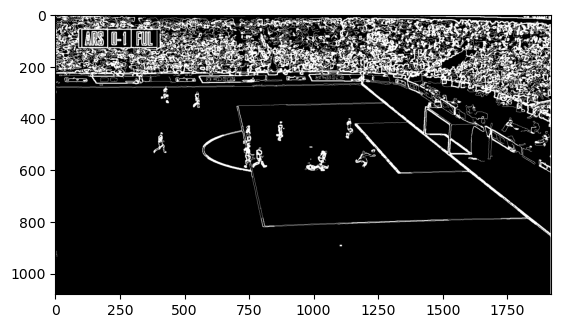

In [92]:
mixed_result = MixedCannyLines(frame, ranges=[0,100,200,255], dilations = [1,2,4])
plt.imshow(mixed_result, cmap='gray')

In [47]:
cap = cv2.VideoCapture('data\Singapore_end.mp4')
count = 0

while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        cv2.imshow("Frame", frame)
        count += 5 # i.e. at 30 fps, this advances one second
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)
        key = cv2.waitKey(5) & 0xFF
        if key == ord("q"):
            print(count)
            break
    else:
        cap.release()
        break


cv2.destroyAllWindows()

910


In [101]:
# PARAMS
#framesize = (1080, 1920)  # desired output size
makeGIF = False
output_frames = []        # saves output
count = 0                # frame indxing
STEP_SIZE = 5          # how many frames to jump by (only opens every n-th frame)
black_frames = 10        # how many frames the fading out takes
black_counter = 0        # counter for that

# multi-line widths:
multiLine = False 
ranges=[0,100,200,255]   # first range is 0-100, then 100-200, etc.
dilations = [1,2,4]    # edges in range 0-100 are made 1 pixel wide, 100-200 is 2 pixels, etc...    more than 3 ranges should be possible
# if false, then just use these values (one constant line thickness):
lower_bound, upper_bound = 0, 60
dilation = 1

# blurring previous frames
blurring = True
blur = 0.2     # what % of the previously rendered frame to add to the current

# load video
cap = cv2.VideoCapture('Input Videos\Fulham_goal.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# get first frame
ret, frame = cap.read()

if multiLine:
    prev_frame = MixedCannyLines(frame, ranges=ranges, dilations=dilations)
else:
    prev_frame = np.zeros_like(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY), dtype=np.uint8) 


while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        count += STEP_SIZE # skips 5 frames forward
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)

        # make the edge detection lines
        if multiLine:
            canny_lines = MixedCannyLines(frame, ranges=ranges, dilations=dilations)
        else: # just one line thickness
            canny_lines = CannyLines(frame, lower_bound=lower_bound, upper_bound=upper_bound, dilation=dilation)

        # indexing, check to see if we want to fade out here
        remaining = length - 0
        if count > remaining: 
            decay_val = int((count - remaining) * 1.1)
            if decay_val > 255: 
                decay_val = 255
                black_counter += 1
                if black_counter > black_frames:
                    cap.release()
                    break 
            canny_lines = np.clip(canny_lines, 0+decay_val, 255.0)
            canny_lines -= decay_val 
        
        # blur some percent of previous frame into the current frame
        if blurring:
            result = blurImages(canny_lines, prev_frame, blur=blur)  
        else:
            result = canny_lines

        # show results, save output frame
        cv2.imshow("Frame", result)
        prev_frame = result
        if makeGIF:   output_frames.append(result)

    # for when we run out of frames  
    else:
        cap.release()
        break
    
    # to close the cv2 window, press the "q" key
    key = cv2.waitKey(5) & 0xFF
    if key == ord("q"):
        print("stopped at", count, "(video file) frames")
        break

cv2.destroyAllWindows()

# save the gif
if makeGIF:
    print("saving GIF...")
    with imageio.get_writer("Sing blur lines.gif", mode="I") as writer: # make a GIF output
        for idx, frame in enumerate(output_frames):
            #print("Adding frame to GIF file: ", idx + 1)
            writer.append_data(frame)

print("done!")
    

stopped at 125 (video file) frames
done!


In [ ]:
# to prevent numeric under/overflow of 8bit ints

if value >= 0:
    v = np.clip(v, 0, 255-value)
    v += value
else:
    value = abs(value)
    v = np.clip(v, 0+value, 255)
    v -= value